# Step 1: Imports and Reading Data

In [3]:
# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Go to project root: .../Scrabble
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)  # 👈 Add root, not src!

from src.constants import GAMES_FILE_PATH, TURNS_FILE_PATH, TRAIN_FILE_PATH

from src.utils import heatmap_correlation, histograms_of_numerical_features, \
    value_counts_for_categorical_features, exclude_bots_from_df, create_dataset

In [5]:
# === Load Data ===
games_df = pd.read_csv(GAMES_FILE_PATH)
turns_df = pd.read_csv(TURNS_FILE_PATH)
train_df = pd.read_csv(TRAIN_FILE_PATH)

dict_of_dfs = {"games DataFrame": games_df, "turns DataFrame": turns_df, "train DataFrame": train_df}

turns_df_without_bots = exclude_bots_from_df(turns_df)
train_df_without_bots = exclude_bots_from_df(train_df)

dict_of_dfs_without_bots = {"turns DataFrame without bots": turns_df_without_bots, 
                            "train DataFrame without bots": train_df_without_bots}

# === Quick Overview ===
for df_name, df in dict_of_dfs.items():
    print(f"{df_name}:")
    display(df.head())
    print(df.info())
    print("\n\n")

games DataFrame:


,game_id,first,time_control_name,game_end_reason,winner,created_at,lexicon,initial_time_seconds,increment_seconds,rating_mode,max_overtime_minutes,game_duration_seconds
0,1,BetterBot,regular,STANDARD,1,8/26/2022 3:38,NWL20,1200,0,CASUAL,1,674.844274
1,2,Super,regular,STANDARD,1,8/10/2022 19:19,CSW21,3600,0,RATED,1,364.214418
2,3,BetterBot,regular,STANDARD,1,9/4/2022 8:04,CSW21,900,0,RATED,5,492.268262
3,4,BetterBot,regular,RESIGNED,0,9/12/2022 2:36,CSW21,3600,0,CASUAL,1,350.861141
4,5,STEEBot,regular,STANDARD,0,9/6/2022 4:31,NWL20,1200,0,CASUAL,1,642.688722


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   game_id                72773 non-null  int64  
 1   first                  72773 non-null  object 
 2   time_control_name      72773 non-null  object 
 3   game_end_reason        72773 non-null  object 
 4   winner                 72773 non-null  int64  
 5   created_at             72773 non-null  object 
 6   lexicon                72773 non-null  object 
 7   initial_time_seconds   72773 non-null  int64  
 8   increment_seconds      72773 non-null  int64  
 9   rating_mode            72773 non-null  object 
 10  max_overtime_minutes   72773 non-null  int64  
 11  game_duration_seconds  72773 non-null  float64
dtypes: float64(1), int64(5), object(6)
memory usage: 6.7+ MB
None



turns DataFrame:


,game_id,turn_number,nickname,rack,location,move,points,score,turn_type
0,1,1,BetterBot,DDEGITT,8G,DIG,10,10,Play
1,1,2,stevy,AEHOPUX,7H,HAP,18,18,Play
2,1,3,BetterBot,DEELTTU,6I,LUTE,16,26,Play
3,1,4,stevy,EMORSUX,5K,UM,16,34,Play
4,1,5,BetterBot,ACDEITU,L5,..DICATE,28,54,Play


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005498 entries, 0 to 2005497
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   game_id      int64 
 1   turn_number  int64 
 2   nickname     object
 3   rack         object
 4   location     object
 5   move         object
 6   points       int64 
 7   score        int64 
 8   turn_type    object
dtypes: int64(4), object(5)
memory usage: 137.7+ MB
None



train DataFrame:


,game_id,nickname,score,rating
0,1,BetterBot,335,1637
1,1,stevy,429,1500
2,3,davidavid,440,1811
3,3,BetterBot,318,2071
4,4,Inandoutworker,119,1473


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100820 entries, 0 to 100819
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   game_id   100820 non-null  int64 
 1   nickname  100820 non-null  object
 2   score     100820 non-null  int64 
 3   rating    100820 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ MB
None





# Step 2: Data Understanding
- A basic statistics summary for all numerical columns for each DataFrame
- Missing Data Check
- Column Types Check

In [3]:
# === A basic statistics summary for all numerical columns for each DataFrame ===
for df_name, df in dict_of_dfs.items():
    print(f"A basic statistics summary of {df_name}:\n")
    print(df.describe())
    print("\n\n")


# === Missing Data Check ===
for df_name, df in dict_of_dfs.items():
    print(f"\n\nMissing values in {df_name}:\n")
    print(df.isnull().sum())
    print("\n\n")


# === Column Types ===
for df_name, df in dict_of_dfs.items():
    print(f"\n\n{df_name} dtypes:\n")
    print(df.dtypes)

A basic statistics summary of games DataFrame:

            game_id        winner  initial_time_seconds  increment_seconds  \
count  72773.000000  72773.000000          72773.000000        72773.00000   
mean   36387.000000      0.350734           1198.034230            0.22856   
std    21007.899907      0.484859            713.185219            2.54802   
min        1.000000     -1.000000             15.000000            0.00000   
25%    18194.000000      0.000000            900.000000            0.00000   
50%    36387.000000      0.000000           1200.000000            0.00000   
75%    54580.000000      1.000000           1200.000000            0.00000   
max    72773.000000      1.000000           3600.000000           60.00000   

       max_overtime_minutes  game_duration_seconds  
count          72773.000000           72773.000000  
mean               2.143707             484.069347  
std                2.989853             333.563128  
min                0.000000          

# Step 3: Feature Understanding (Univariate Analysis)

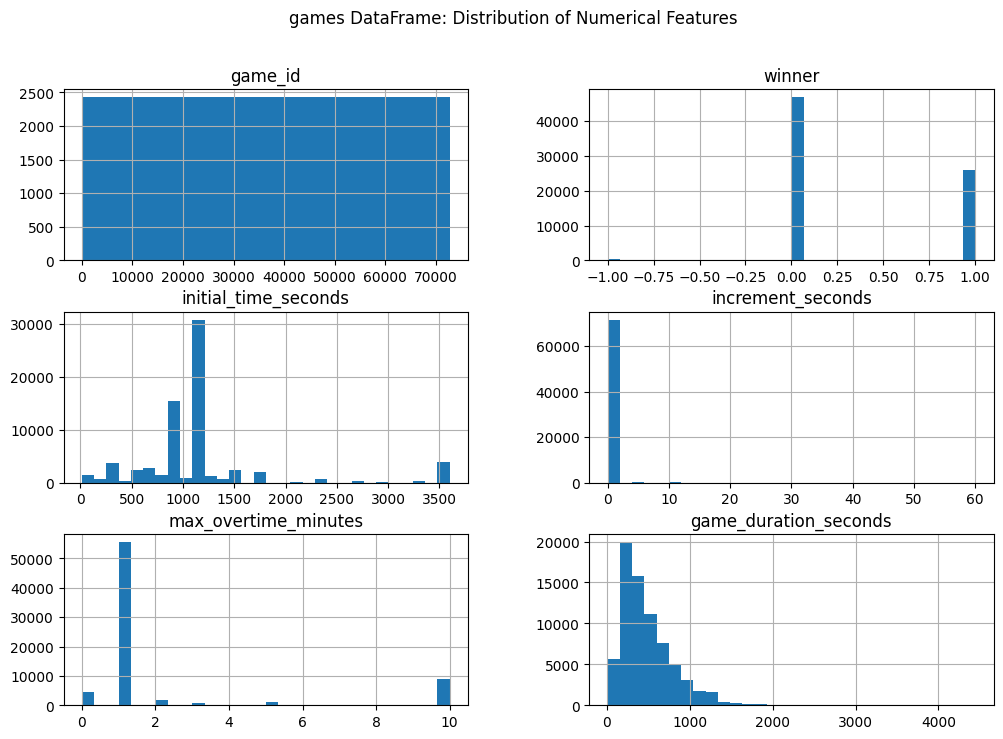


Value counts for first:
 first
STEEBot         12210
BetterBot       12014
HastyBot        11632
BB-8             3288
hannahbanana     1008
pandorable        880
marvin            647
Goldenlamb        547
Eloquent          518
hulkbuster        333
Name: count, dtype: int64

Value counts for time_control_name:
 time_control_name
regular       60282
rapid          6652
blitz          4468
ultrablitz     1371
Name: count, dtype: int64

Value counts for game_end_reason:
 game_end_reason
STANDARD              67987
RESIGNED               2346
TIME                   2202
CONSECUTIVE_ZEROES      238
Name: count, dtype: int64

Value counts for created_at:
 created_at
9/18/2022 15:51    9
9/20/2022 2:35     8
9/10/2022 8:08     8
9/16/2022 16:23    7
9/16/2022 16:53    7
9/19/2022 13:40    7
9/18/2022 13:56    7
9/3/2022 5:11      7
9/9/2022 1:58      6
9/18/2022 2:16     6
Name: count, dtype: int64

Value counts for lexicon:
 lexicon
CSW21     44594
NWL20     21250
ECWL       6925
NSWL20  

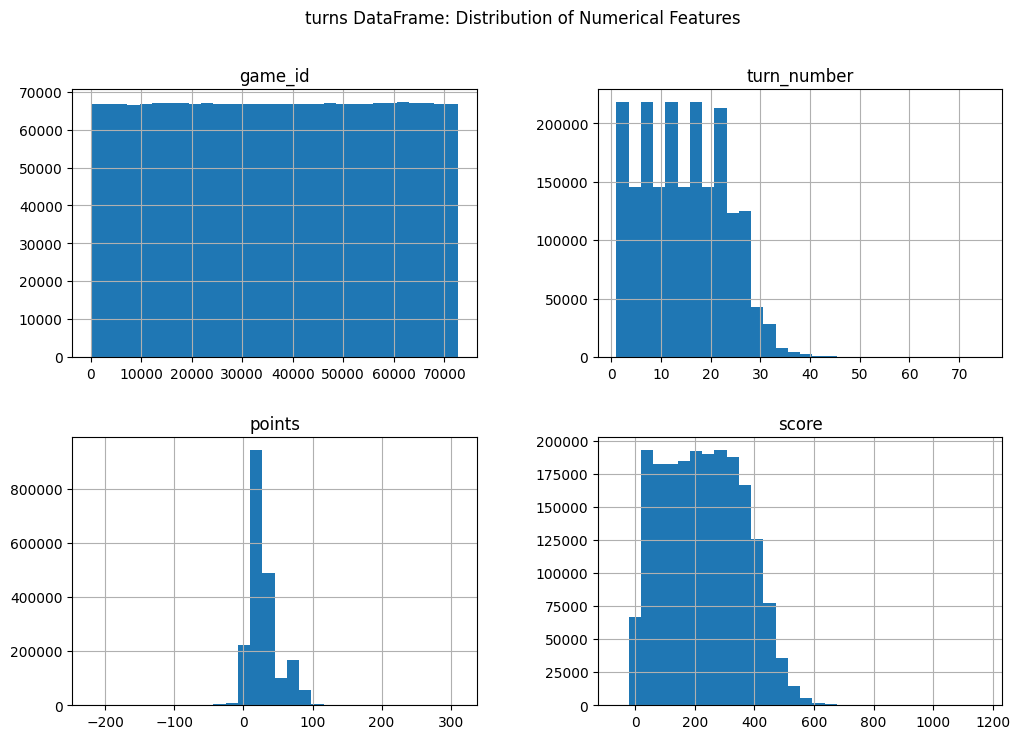


Value counts for nickname:
 nickname
BetterBot       360931
STEEBot         333276
HastyBot        309554
BB-8             92896
hannahbanana     26299
pandorable       26075
marvin           15558
Eloquent         14451
Goldenlamb       13304
hulkbuster       11320
Name: count, dtype: int64

Value counts for rack:
 rack
I    2900
U    1883
E    1780
R    1772
N    1655
T    1489
A    1461
L    1330
O    1240
Q     859
Name: count, dtype: int64

Value counts for location:
 location
15A    24190
H1     23894
8D     23499
O1     23377
8G     22077
8A     15941
8H     13729
1A     12988
A1     12352
12A    12004
Name: count, dtype: int64

Value counts for move:
 move
--        14302
QI        14221
Q.        10318
-          8065
.I         5167
OI         4635
XI         4419
(time)     4143
OX         3659
EX         3410
Name: count, dtype: int64

Value counts for turn_type:
 turn_type
Play             1872864
End                67987
Exchange           48997
Pass                8065


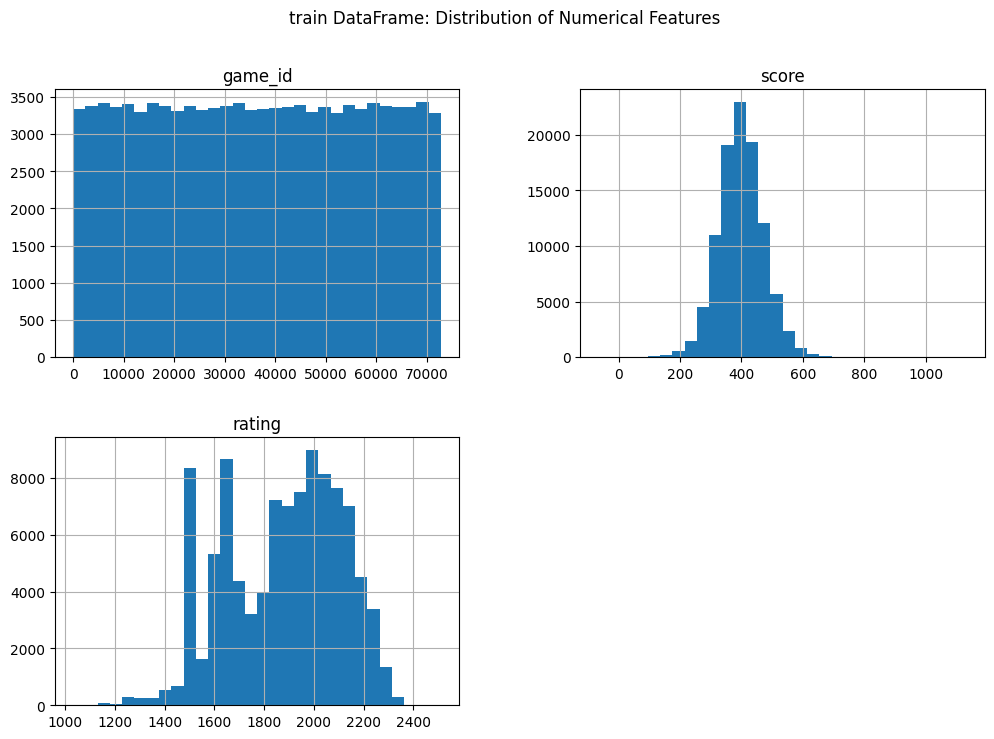


Value counts for nickname:
 nickname
HastyBot      17346
BetterBot     16602
STEEBot       16462
BB-8           6576
pandorable     1759
Goldenlamb     1029
HivinD          592
kar2008         576
Rexington       561
Anita           555
Name: count, dtype: int64





In [4]:
for df_name, df in dict_of_dfs.items():

    # Histograms of numerical features
    histograms_of_numerical_features(df, f"{df_name}: Distribution of Numerical Features")

    # Value counts for categorical features
    value_counts_for_categorical_features(df)

    print("\n\n")

# Step 4: Feature Relationships

### Create Rating vs. Score graph

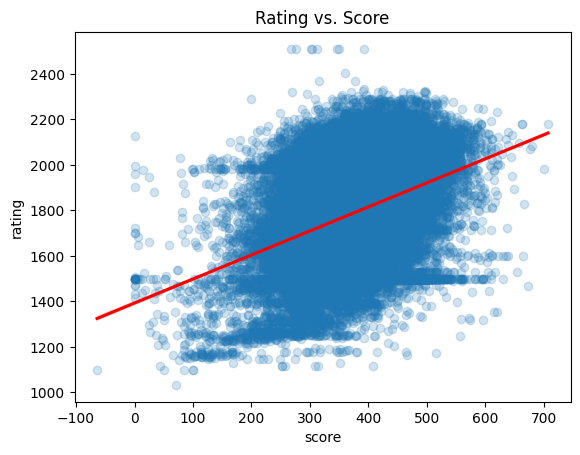

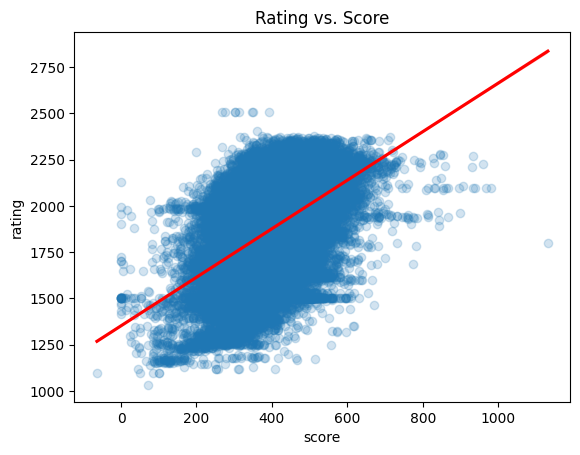

In [6]:
sns.regplot(data=train_df_without_bots, x='score', y='rating', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Rating vs. Score')
plt.show()

sns.regplot(data=train_df, x='score', y='rating', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Rating vs. Score')
plt.show()

### Correlation between column for each DataFrame

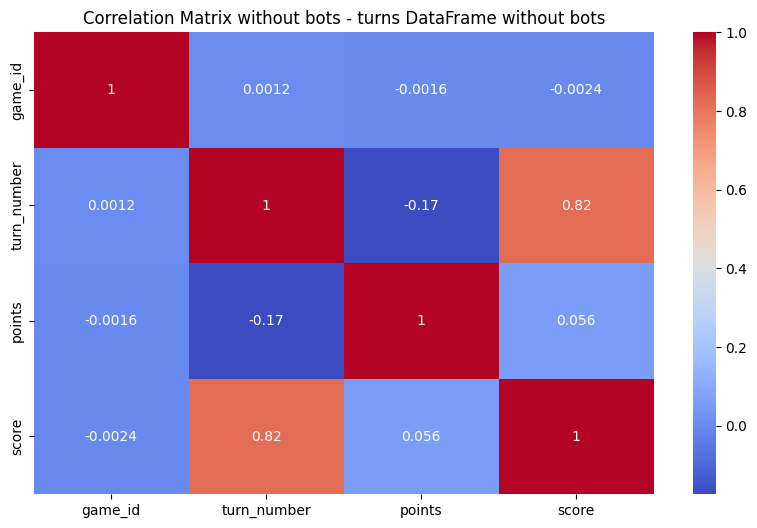

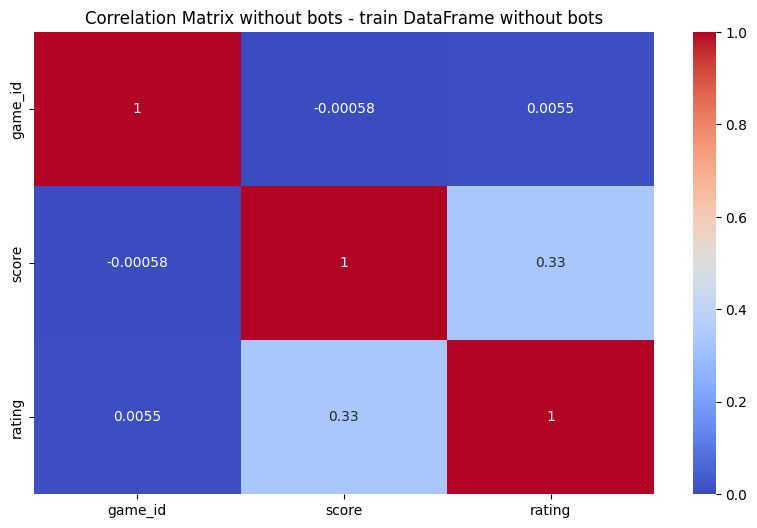

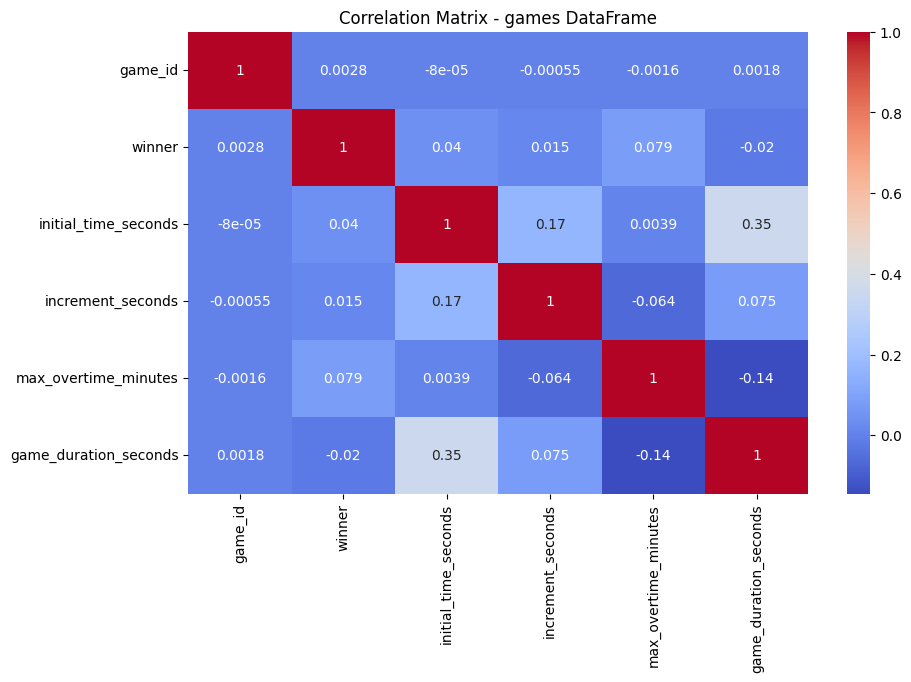

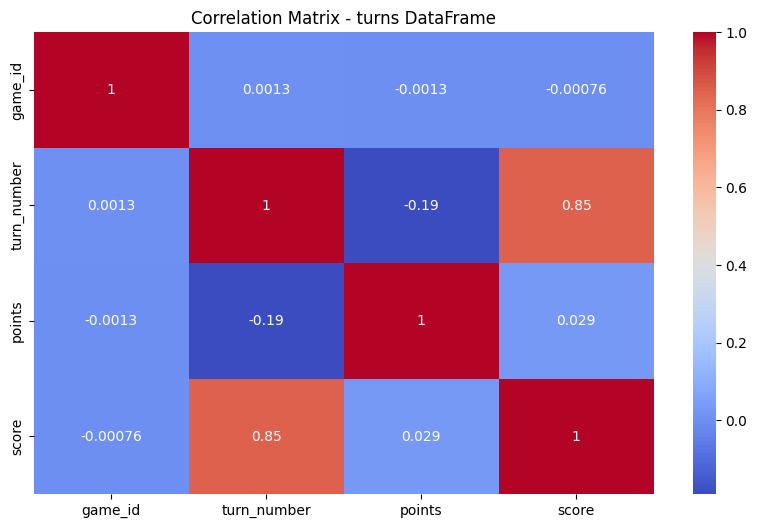

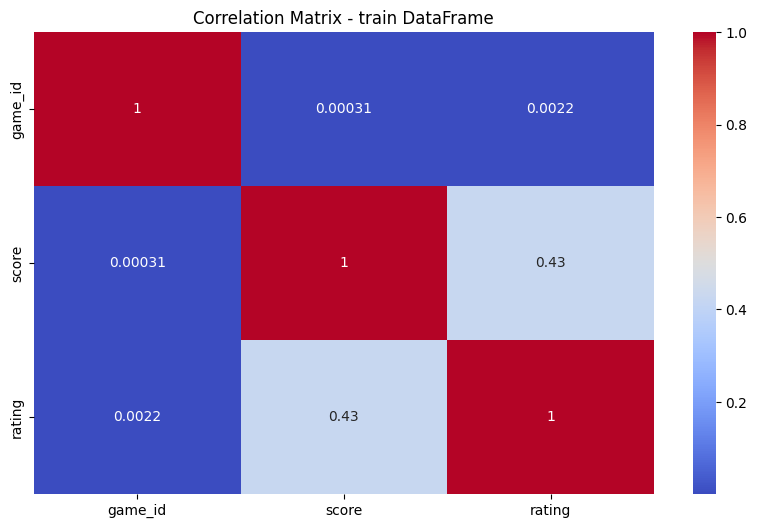

In [7]:
for df_name, df in dict_of_dfs_without_bots.items(): 
    heatmap_correlation(df, f"Correlation Matrix without bots - {df_name}")
    print("\n")

for df_name, df in dict_of_dfs.items(): 
    heatmap_correlation(df, f"Correlation Matrix - {df_name}")
    print("\n")

### Create Rating vs Avg Points graph

       game_id  avg_points_per_turn_per_user  rating
0            1                     30.642857    1500
1            3                     31.428571    1811
2            4                      8.500000    1473
3            5                     20.312500    1500
4            6                     31.500000    2029
...        ...                           ...     ...
50405    72767                     21.250000    1395
50406    72770                      6.062500    1332
50407    72771                     24.375000    1500
50408    72772                     24.250000    1364
50409    72773                     31.916667    2075

[50410 rows x 3 columns]


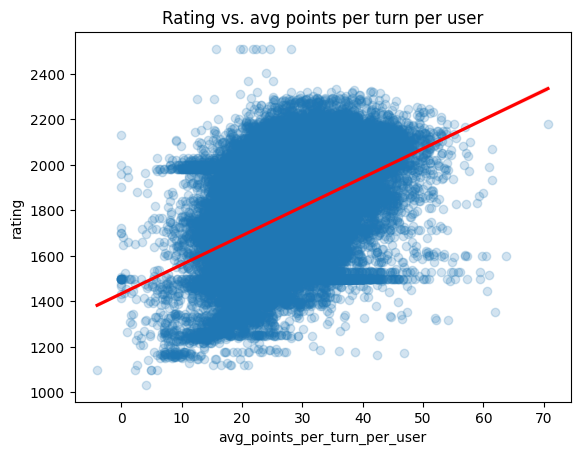

In [8]:
# Calculate average points per turn for each registered user
average_points_per_turn_df = turns_df_without_bots.groupby('game_id', as_index=False)['points'].mean()
average_points_per_turn_df.columns = ['game_id', 'avg_points_per_turn_per_user']

# Merging only the 'rating' column from train_df_without_bots
result = pd.merge(
    average_points_per_turn_df[['game_id', 'avg_points_per_turn_per_user']],
    train_df_without_bots[['game_id', 'rating']],  # Select only game_id and rating
    on='game_id',
    how='inner'  # Only keep rows where game_id exists in both DataFrames
)
print(result)

sns.regplot(data=result, x='avg_points_per_turn_per_user', y='rating', scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Rating vs. avg points per turn per user')
plt.show()

### Correlation between Rating & avg points per turn

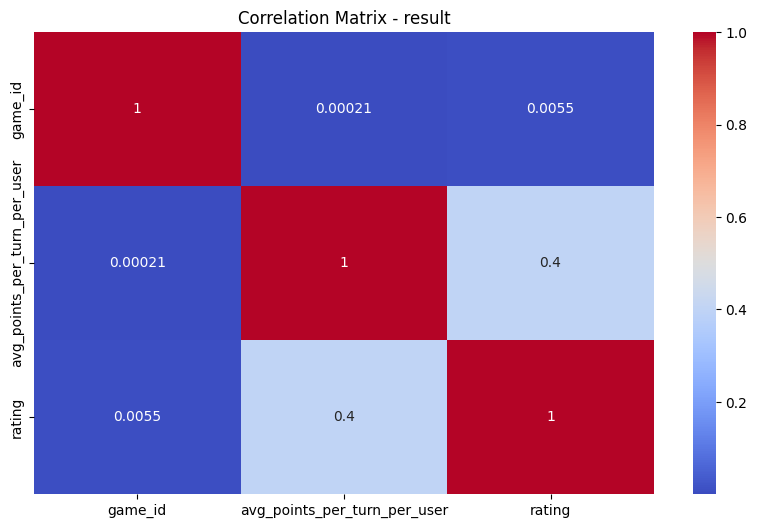

In [8]:
heatmap_correlation(result, "Correlation Matrix - result")

# Step 5: Feature Engineering

## Creating dataset with all features and 'y' target (dataset contains also testing data)

In [10]:
dataset = create_dataset()
display(dataset.head(15))
print(dataset.info())

,avg_word_length,bingo_count,hard_letter_plays,negative_turns_count,pass_count,exchange_count,user_score,avg_extra_points_per_turn,lexicon,bot_score,...,bot_level,score_diff,aggression_score,bingo_density,efficiency_score,bot_rating_diff,bingo_efficiency,hard_letter_rate,bot_performance_ratio,user_rating
0,3.857143,2,2,0,0,0,429,24.785714,NWL20,335,...,1,94,95.602041,0.004662,111.221934,1302,143.000000,0.004662,0.204643,1500
1,4.357143,3,2,0,1,1,488,27.642857,CSW21,401,...,1,87,120.443878,0.006148,111.999743,1599,122.000000,0.004098,0.200500,0
2,4.357143,2,4,0,0,0,440,23.642857,CSW21,318,...,1,122,103.015306,0.004545,100.983375,1753,146.666667,0.009091,0.153549,1811
3,2.928571,1,0,0,0,2,119,4.714286,CSW21,478,...,1,-359,13.806122,0.008403,40.634008,1458,59.500000,0.000000,0.246901,1473
4,3.375000,0,4,0,0,1,325,13.812500,NWL20,427,...,2,-102,46.617188,0.000000,96.296011,1417,325.000000,0.012308,0.231562,1500
5,4.750000,0,3,0,0,0,378,23.750000,CSW21,427,...,2,-49,112.812500,0.000000,79.578780,1716,378.000000,0.007937,0.199253,2029
6,3.846154,1,2,0,0,1,379,22.153846,CSW21,377,...,2,2,85.207101,0.002639,98.539744,1705,189.500000,0.005277,0.181076,0
7,4.636364,2,2,0,0,0,414,29.818182,CSW21,528,...,3,-114,138.247934,0.004831,89.293925,1716,138.000000,0.004831,0.235294,2067
8,4.133333,2,2,0,0,1,364,18.066667,NWL20,464,...,1,-100,74.675556,0.005495,88.064303,1160,121.333333,0.005495,0.285714,1641
9,3.714286,1,2,0,2,0,299,15.285714,CSW21,415,...,1,-116,56.775510,0.003344,80.499783,1557,149.500000,0.006689,0.210446,1838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72773 entries, 0 to 72772
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avg_word_length            72773 non-null  float64
 1   bingo_count                72773 non-null  int64  
 2   hard_letter_plays          72773 non-null  int64  
 3   negative_turns_count       72773 non-null  int64  
 4   pass_count                 72773 non-null  int64  
 5   exchange_count             72773 non-null  int64  
 6   user_score                 72773 non-null  int64  
 7   avg_extra_points_per_turn  72773 non-null  float64
 8   lexicon                    72773 non-null  object 
 9   bot_score                  72773 non-null  int64  
 10  bot_rating                 72773 non-null  int64  
 11  bot_level                  72773 non-null  int64  
 12  score_diff                 72773 non-null  int64  
 13  aggression_score           72773 non-null  flo

## Creating training examples df (without testing data)

In [11]:
# Filter out rows of testing data (rows without user_rating value)
training_examples = dataset[dataset['user_rating'] != 0]
display(training_examples.head(15))
print(training_examples.info())

,avg_word_length,bingo_count,hard_letter_plays,negative_turns_count,pass_count,exchange_count,user_score,avg_extra_points_per_turn,lexicon,bot_score,...,bot_level,score_diff,aggression_score,bingo_density,efficiency_score,bot_rating_diff,bingo_efficiency,hard_letter_rate,bot_performance_ratio,user_rating
0,3.857143,2,2,0,0,0,429,24.785714,NWL20,335,...,1,94,95.602041,0.004662,111.221934,1302,143.000000,0.004662,0.204643,1500
2,4.357143,2,4,0,0,0,440,23.642857,CSW21,318,...,1,122,103.015306,0.004545,100.983375,1753,146.666667,0.009091,0.153549,1811
3,2.928571,1,0,0,0,2,119,4.714286,CSW21,478,...,1,-359,13.806122,0.008403,40.634008,1458,59.500000,0.000000,0.246901,1473
4,3.375000,0,4,0,0,1,325,13.812500,NWL20,427,...,2,-102,46.617188,0.000000,96.296011,1417,325.000000,0.012308,0.231562,1500
5,4.750000,0,3,0,0,0,378,23.750000,CSW21,427,...,2,-49,112.812500,0.000000,79.578780,1716,378.000000,0.007937,0.199253,2029
7,4.636364,2,2,0,0,0,414,29.818182,CSW21,528,...,3,-114,138.247934,0.004831,89.293925,1716,138.000000,0.004831,0.235294,2067
8,4.133333,2,2,0,0,1,364,18.066667,NWL20,464,...,1,-100,74.675556,0.005495,88.064303,1160,121.333333,0.005495,0.285714,1641
9,3.714286,1,2,0,2,0,299,15.285714,CSW21,415,...,1,-116,56.775510,0.003344,80.499783,1557,149.500000,0.006689,0.210446,1838
11,4.000000,0,3,0,0,1,351,16.666667,ECWL,408,...,3,-57,66.666667,0.000000,87.749781,1206,351.000000,0.008547,0.252788,1500
12,4.000000,3,4,0,0,0,434,31.909091,CSW21,381,...,2,53,127.636364,0.006912,108.499729,1741,108.500000,0.009217,0.179548,2017


<class 'pandas.core.frame.DataFrame'>
Index: 50410 entries, 0 to 72772
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   avg_word_length            50410 non-null  float64
 1   bingo_count                50410 non-null  int64  
 2   hard_letter_plays          50410 non-null  int64  
 3   negative_turns_count       50410 non-null  int64  
 4   pass_count                 50410 non-null  int64  
 5   exchange_count             50410 non-null  int64  
 6   user_score                 50410 non-null  int64  
 7   avg_extra_points_per_turn  50410 non-null  float64
 8   lexicon                    50410 non-null  object 
 9   bot_score                  50410 non-null  int64  
 10  bot_rating                 50410 non-null  int64  
 11  bot_level                  50410 non-null  int64  
 12  score_diff                 50410 non-null  int64  
 13  aggression_score           50410 non-null  float64


## Correlation between features and target label

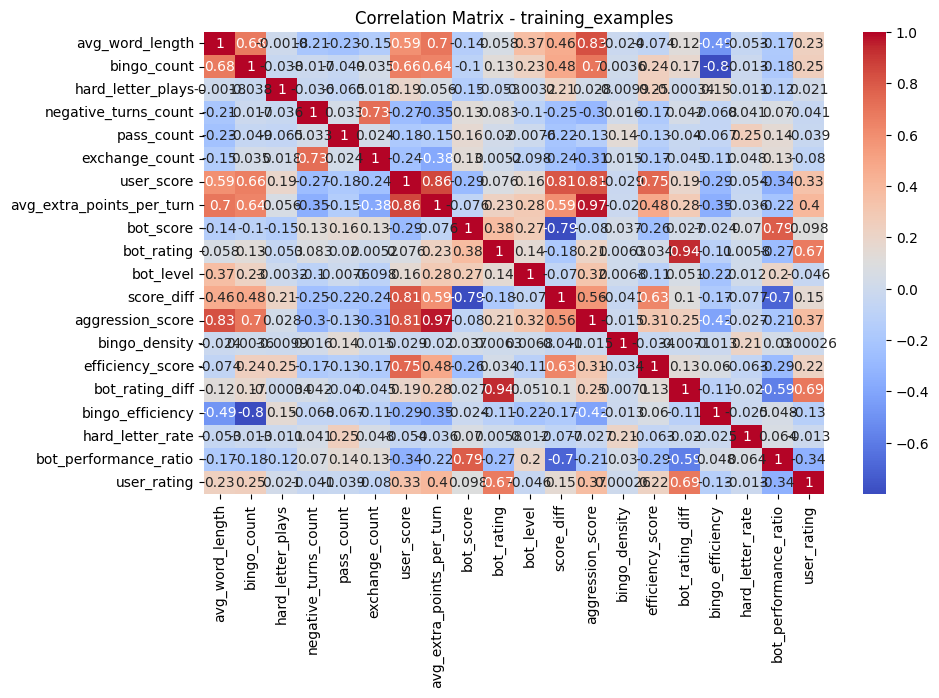

In [12]:
 heatmap_correlation(training_examples, f"Correlation Matrix - training_examples")

## Creating X (features) and y (target)  

In [13]:
X = training_examples.drop(columns=['user_rating'])
display(X.head(15))

y = training_examples['user_rating']
display(y.head(15))

,avg_word_length,bingo_count,hard_letter_plays,negative_turns_count,pass_count,exchange_count,user_score,avg_extra_points_per_turn,lexicon,bot_score,bot_rating,bot_level,score_diff,aggression_score,bingo_density,efficiency_score,bot_rating_diff,bingo_efficiency,hard_letter_rate,bot_performance_ratio
0,3.857143,2,2,0,0,0,429,24.785714,NWL20,335,1637,1,94,95.602041,0.004662,111.221934,1302,143.000000,0.004662,0.204643
2,4.357143,2,4,0,0,0,440,23.642857,CSW21,318,2071,1,122,103.015306,0.004545,100.983375,1753,146.666667,0.009091,0.153549
3,2.928571,1,0,0,0,2,119,4.714286,CSW21,478,1936,1,-359,13.806122,0.008403,40.634008,1458,59.500000,0.000000,0.246901
4,3.375000,0,4,0,0,1,325,13.812500,NWL20,427,1844,2,-102,46.617188,0.000000,96.296011,1417,325.000000,0.012308,0.231562
5,4.750000,0,3,0,0,0,378,23.750000,CSW21,427,2143,2,-49,112.812500,0.000000,79.578780,1716,378.000000,0.007937,0.199253
7,4.636364,2,2,0,0,0,414,29.818182,CSW21,528,2244,3,-114,138.247934,0.004831,89.293925,1716,138.000000,0.004831,0.235294
8,4.133333,2,2,0,0,1,364,18.066667,NWL20,464,1624,1,-100,74.675556,0.005495,88.064303,1160,121.333333,0.005495,0.285714
9,3.714286,1,2,0,2,0,299,15.285714,CSW21,415,1972,1,-116,56.775510,0.003344,80.499783,1557,149.500000,0.006689,0.210446
11,4.000000,0,3,0,0,1,351,16.666667,ECWL,408,1614,3,-57,66.666667,0.000000,87.749781,1206,351.000000,0.008547,0.252788
12,4.000000,3,4,0,0,0,434,31.909091,CSW21,381,2122,2,53,127.636364,0.006912,108.499729,1741,108.500000,0.009217,0.179548


0     1500
2     1811
3     1473
4     1500
5     2029
7     2067
8     1641
9     1838
11    1500
12    2017
14    1863
15    1829
16    1500
17    1948
18    2151
Name: user_rating, dtype: int64